# Sentiment Datasets Processing

This notebook processes the following datasets:

1. **[Twitter tweets sentiment dataset](https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset)**
    - **License**: CC0: Public Domain  
    This dataset can be used, modified, and distributed without restrictions, for both commercial and non-commercial purposes.

2. **[Multiclass sentiment analysis dataset](https://huggingface.co/datasets/Sp1786/multiclass-sentiment-analysis-dataset)**
    - **License**: Apache 2.0  
     This dataset can be used and modified freely, provided proper attribution and licensing information is retained.
    - **Authors**: [Sp1786](https://huggingface.co/Sp1786)

3. **[Tweet eval](https://huggingface.co/datasets/cardiffnlp/tweet_eval)**
    - **License**: Creative Commons Attribution 3.0 Unported (CC BY 3.0)  
     Requires attribution to the original authors. Data can be used and modified with proper credit.
    - **Authors**:
      - Francesco Barbieri, Jose Camacho-Collados, Luis Espinosa-Anke, Leonardo Neves.
      - Sara Rosenthal, Noura Farra, Preslav Nakov.
    - **Citations**:
         ```plaintext
         @inproceedings{barbieri2020tweeteval,
         title={{TweetEval: Unified Benchmark and Comparative Evaluation for Tweet Classification}},
         author={Barbieri, Francesco and Camacho-Collados, Jose and Espinosa-Anke, Luis and Neves, Leonardo},
         booktitle={Proceedings of Findings of EMNLP},
         year={2020}
         }
         ```
         ```plaintext
         @inproceedings{rosenthal2017semeval,
         title={SemEval-2017 task 4: Sentiment analysis in Twitter},
         author={Rosenthal, Sara and Farra, Noura and Nakov, Preslav},
         booktitle={Proceedings of the 11th international workshop on semantic evaluation (SemEval-2017)},
         pages={502--518},
         year={2017}
         }
         ```
---

## Goal
The goal of this preprocessing step is to create a dataset for sentiment analysis with a total size between 75k and 125k records, distributed into three classes:
- **0**: Negative
- **1**: Neutral
- **2**: Positive

*The obtained data is imbalanced in terms of the number of records per class. To address this during model training, class weighting should be considered.*

---

## Table of Contents

1. [Imports and mappers](#imports-and-mappers)
2. [Twitter tweets sentiment dataset preprocessing](#twitter-tweets-sentiment-dataset)
3. [Multiclass sentiment analysis dataset preprocessing](#multiclass-sentiment-analysis-dataset)
4. [Tweet eval preprocessing](#tweet-eval)
5. [Combining datasets](#combining-datasets)
6. [Cleaning combined dataset](#cleaning-combined-dataset)
7. [Distribution of values in the 'label' column](#distribution-of-values-in-the-label-column)
8. [Saving to file](#saving-to-file)

# Imports and mappers

In [1]:
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
reverse_labels_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Twitter tweets sentiment dataset

Preprocessing the dataset.

In [3]:
dataset1 = pd.read_csv('twitter_tweets_sentiment_dataset.csv')

In [4]:
dataset1.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [5]:
dataset1.drop(['textID', 'selected_text'], axis=1, inplace=True)
dataset1.describe()

,text,sentiment
count,27480,27481
unique,27480,3
top,All this flirting going on - The ATG smiles...,neutral
freq,1,11118


In [6]:
dataset1.isnull().sum()

text         1
sentiment    0
dtype: int64

In [7]:
dataset1.dropna(inplace=True)

In [8]:
dataset1.duplicated().sum()

np.int64(0)

In [9]:
dataset1['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [10]:
dataset1.rename(columns={'sentiment': 'label'}, inplace=True)

In [11]:
dataset1['label'] = dataset1['label'].map(label_mapping)

In [12]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27480 non-null  object
 1   label   27480 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 644.1+ KB


# Multiclass sentiment analysis dataset

Preprocessing the dataset.

In [13]:
!set HF_HUB_DISABLE_SYMLINKS_WARNING=1

In [14]:
ds2 = load_dataset('Sp1786/multiclass-sentiment-analysis-dataset')
dataset2 = pd.concat([pd.DataFrame(ds2[split]) for split in ds2.keys()], ignore_index=True)

In [15]:
dataset2.head()

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",2,positive
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive
3,14182,naw idk what ur talkin about,1,neutral
4,17840,That sucks to hear. I hate days like that,0,negative


In [16]:
dataset2.drop(['id', 'sentiment'], axis=1, inplace=True)
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41643 entries, 0 to 41642
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    41642 non-null  object
 1   label   41643 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 650.8+ KB


In [17]:
dataset2.isnull().sum()

text     1
label    0
dtype: int64

In [18]:
dataset2.dropna(inplace=True)

In [19]:
dataset2.duplicated().sum()

np.int64(0)

In [20]:
dataset2['label'].unique()

array([2, 1, 0])

# Tweet eval

Preprocessing the dataset.

In [21]:
!set HF_HUB_DISABLE_SYMLINKS_WARNING=1

In [22]:
ds3 = load_dataset('cardiffnlp/tweet_eval', 'sentiment')
dataset3 = pd.concat([pd.DataFrame(ds3[split]) for split in ds3.keys()], ignore_index=True)

In [23]:
dataset3.head()

,text,label
0,"""QT @user In the original draft of the 7th boo...",2
1,"""Ben Smith / Smith (concussion) remains out of...",1
2,Sorry bout the stream last night I crashed out...,1
3,Chase Headley's RBI double in the 8th inning o...,1
4,@user Alciato: Bee will invest 150 million in ...,2


According to the source site, the labeling corresponds to:
* 0: negative
* 1: neutral
* 2: positive

In [24]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59899 entries, 0 to 59898
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    59899 non-null  object
 1   label   59899 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 936.1+ KB


In [25]:
dataset3.isnull().sum()

text     0
label    0
dtype: int64

In [26]:
dataset3.duplicated().sum()

np.int64(26)

In [27]:
dataset3[dataset3.duplicated()]

,text,label
12555,Sangam University Bhilwara Salutes Nobel Laure...,2
16312,"""I'm going to @user at US Bank Arena in Cincin...",1
19532,"""Charlie Rose with Desmond Tutu; Bill Joy (Oct...",1
22040,275 photos of 01 Oct 2014 Rock on Dandiya Nite...,1
22163,After the Blood Moon comes the Pumpkin Sun via...,1
22336,Cycling Mission with Passion Team #Ride2Light ...,1
22568,"""Charlie Rose with Bill Joy; Daniel Barenboim ...",1
23020,Republican candidate Carly Fiorina tweets that...,2
23579,After the Blood Moon comes the Pumpkin Sun,1
28152,I won the 2nd Star in my McLaren 12C in #CSRRa...,2


In [28]:
dataset3.drop_duplicates(inplace=True)

In [29]:
dataset3['label'].unique()

array([2, 1, 0])

# Combining datasets

In [30]:
combined_df = pd.concat([dataset1, dataset2, dataset3], ignore_index=True)
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [31]:
combined_df.head()

,text,label
0,Florida should be nice.,2
1,If your pupils can use an iPad better than you...,2
2,So physical therapy,1
3,I may be the odd man out on this but I don\u20...,0
4,@user haha I shall. (: what are you two doing ...,2


In [32]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128995 entries, 0 to 128994
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    128995 non-null  object
 1   label   128995 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


In [33]:
combined_df.isnull().sum()

text     0
label    0
dtype: int64

In [34]:
combined_df.duplicated().sum()

np.int64(27480)

In [35]:
combined_df[combined_df.duplicated()]

,text,label
389,I am like the most saddest person on jtv righ...,0
1092,awww poor little girl on britains got talent,0
1685,"my girlfriend still likes sesame st, and so do I",2
2218,G`night!,1
2276,about to start getting ready for work. took l...,1
...,...,...
128977,sleeping in my own bed tonight... at home!!,1
128982,I didn`t know you had a blog!!! That`s so aw...,2
128985,_McFlyy FINALY MY CHANCE HAS CAME. . TO KILL Y...,1
128992,http://twitpic.com/4jken - fire and urban at r...,1


In [36]:
combined_df.drop_duplicates(inplace=True)

In [37]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101515 entries, 0 to 128994
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    101515 non-null  object
 1   label   101515 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [38]:
combined_df['label'].value_counts(normalize=True)

label
1    0.423267
2    0.344806
0    0.231926
Name: proportion, dtype: float64

# Cleaning combined dataset

Minimal text cleaning. Contemporary algorithms can leverage elements such as punctuation, spelling, and text structure as additional context to enhance analysis.

* Remove links
* Remove mentions 
* Preserve characters and punctuation
* Get rid of whitespaces
* Save hashtags (can be used as context)

In [39]:
import re


def clean_text(text):
    text = re.sub(r'http\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^A-Za-z0-9\s.,!?]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [40]:
combined_df['text'] = combined_df['text'].apply(clean_text)

Removing very short texts

Texts that are 1-2 chars length can be noise and do not contribute to better model training.

In [41]:
combined_df = combined_df[combined_df['text'].str.len() > 3]

In [42]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101419 entries, 0 to 128994
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    101419 non-null  object
 1   label   101419 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [43]:
combined_df.isnull().sum()

text     0
label    0
dtype: int64

In [44]:
combined_df.duplicated().sum()

np.int64(150)

In [45]:
combined_df[combined_df.duplicated()]

,text,label
4350,Happy Mothers Day!,2
6746,Happy Mothers Day,2
7838,thanks,2
9064,I love it,2
11017,"Breaking from the 11th commandment, Scott Walk...",1
...,...,...
123690,happy mothers day!,2
123808,Its okay,0
123933,"Read the 14th Admendment, thats were SCOTUS sa...",1
128422,Sensation Ocean of White Portugal absolutely a...,2


In [46]:
combined_df = combined_df.drop_duplicates().reset_index(drop=True)

In [47]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101269 entries, 0 to 101268
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    101269 non-null  object
 1   label   101269 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


# Distribution of values in the 'label' column

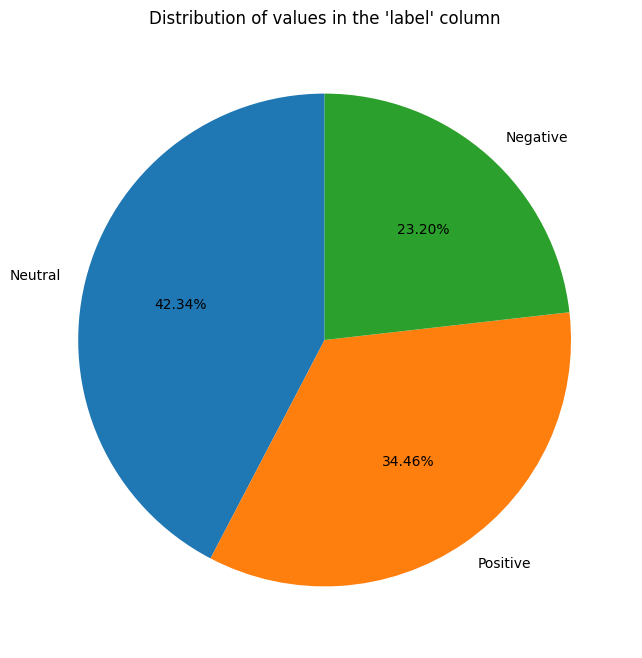

In [48]:
label_counts = combined_df['label'].value_counts()
labels = label_counts.index
sizes = label_counts.values

labels = [reverse_labels_mapping[label] for label in labels]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title("Distribution of values in the 'label' column")
plt.show()

# Saving to file

In [49]:
combined_df.to_csv(
    'sentiment_dataset.csv',
    index=False,
    sep=',',
    encoding='utf-8'
)

combined_df.to_parquet(
    'sentiment_dataset.parquet',
    index=False,
)